In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

# Set GD limit
limit = 3

# Set CSV paths
teams_csv = 'data/2025/womens_l2_sw_teams.csv'
scores_csv = 'data/2025/JUNE_womens_l2_sw_results.csv'

In [16]:
teams_df = pd.read_csv(teams_csv)
teams_df

,Club ID,Club
0,183415,OAKVILLE SC L2 WOMEN
1,175323,BURLINGTON SC L2 WOMEN
2,175386,FC LONDON L2 WOMEN
3,175329,GUELPH UNITED FC L2 WOMEN
4,175334,HAMILTON UNITED L2 WOMEN
5,175738,RUSH CANADA ACADEMY L2 WOMEN
6,175398,ST CATHARINES ROMA WOMEN
7,183413,CAMBRIDGE UNITED WOMEN
8,183423,WATERLOO UNITED L2 WOMEN
9,183412,RAILWAY CITY FC WOMEN


In [17]:
scores_df = pd.read_csv(scores_csv)
season_name = scores_df['Name'].iloc[0]
scores_df

,Match ID,home_result,away_result,Home team,Away team,Name,Match date (EDT)
0,262608430,2,0,175398,183413,League2 Ontario (W) Southwest 2025,2025-06-04 20:00:00
1,262608435,1,2,175398,175386,League2 Ontario (W) Southwest 2025,2025-06-25 20:30:00
2,262608441,2,2,183412,183413,League2 Ontario (W) Southwest 2025,2025-06-01 16:00:00
3,262608442,2,0,175386,183415,League2 Ontario (W) Southwest 2025,2025-06-01 18:00:00
4,262608443,3,1,183423,175738,League2 Ontario (W) Southwest 2025,2025-06-04 19:00:00
5,262608444,2,2,175329,175334,League2 Ontario (W) Southwest 2025,2025-06-05 21:00:00
6,262608445,0,2,183413,183412,League2 Ontario (W) Southwest 2025,2025-06-08 17:00:00
7,262608446,0,3,175329,175398,League2 Ontario (W) Southwest 2025,2025-06-09 21:00:00
8,262608447,4,1,175738,175323,League2 Ontario (W) Southwest 2025,2025-06-09 21:00:00
9,262608448,1,1,175334,175386,League2 Ontario (W) Southwest 2025,2025-06-12 20:30:00


In [18]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [19]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           OAKVILLE SC L2 WOMEN  BURLINGTON SC L2 WOMEN  FC LONDON L2 WOMEN  GUELPH UNITED FC L2 WOMEN  HAMILTON UNITED L2 WOMEN  RUSH CANADA ACADEMY L2 WOMEN  ST CATHARINES ROMA WOMEN  CAMBRIDGE UNITED WOMEN  WATERLOO UNITED L2 WOMEN  RAILWAY CITY FC WOMEN
262608430                     0                       0                   0                          0                         0                             0                         1                      -1                         0                      0
262608435                     0                       0                   1                          0                         0                             0                        -1                       0                         0                      0
262608441                     0                       0                   0                          0                         0                             0                         0                      -1                  

In [20]:
print(X_df.T.to_string())

                              262608430  262608435  262608441  262608442  262608443  262608444  262608445  262608446  262608447  262608448  262608449  262608450  262608451  262608452  262608453  262608454  262608455  262608456  262608457  262608458  262608459  262608460  262608461
OAKVILLE SC L2 WOMEN                  0          0          0         -1          0          0          0          0          0          0          0          1          0          0         -1          0          0          0          0          0         -1          0          0
BURLINGTON SC L2 WOMEN                0          0          0          0          0          0          0          0         -1          0         -1          0          0          0          0          0          0         -1          0          0          0          0         -1
FC LONDON L2 WOMEN                    0          1          0          1          0          0          0          0          0         -1          0     

In [21]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                              OAKVILLE SC L2 WOMEN  BURLINGTON SC L2 WOMEN  FC LONDON L2 WOMEN  GUELPH UNITED FC L2 WOMEN  HAMILTON UNITED L2 WOMEN  RUSH CANADA ACADEMY L2 WOMEN  ST CATHARINES ROMA WOMEN  CAMBRIDGE UNITED WOMEN  WATERLOO UNITED L2 WOMEN  RAILWAY CITY FC WOMEN
OAKVILLE SC L2 WOMEN                             4                       0                  -1                          0                         0                             0                        -1                      -1                        -1                      0
BURLINGTON SC L2 WOMEN                           0                       4                  -1                          0                         0                            -1                        -1                       0                         0                     -1
FC LONDON L2 WOMEN                              -1                      -1                   5                         -1                        -1                      

In [22]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                              OAKVILLE SC L2 WOMEN  BURLINGTON SC L2 WOMEN  FC LONDON L2 WOMEN  GUELPH UNITED FC L2 WOMEN  HAMILTON UNITED L2 WOMEN  RUSH CANADA ACADEMY L2 WOMEN  ST CATHARINES ROMA WOMEN  CAMBRIDGE UNITED WOMEN  WATERLOO UNITED L2 WOMEN  RAILWAY CITY FC WOMEN
OAKVILLE SC L2 WOMEN                             4                       0                  -1                          0                         0                             0                        -1                      -1                        -1                      0
BURLINGTON SC L2 WOMEN                           0                       4                  -1                          0                         0                            -1                        -1                       0                         0                     -1
FC LONDON L2 WOMEN                              -1                      -1                   5                         -1                        -1                      

In [23]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                              GD
OAKVILLE SC L2 WOMEN          -5
BURLINGTON SC L2 WOMEN       -20
FC LONDON L2 WOMEN            12
GUELPH UNITED FC L2 WOMEN     -7
HAMILTON UNITED L2 WOMEN      -2
RUSH CANADA ACADEMY L2 WOMEN   3
ST CATHARINES ROMA WOMEN       6
CAMBRIDGE UNITED WOMEN        -6
WATERLOO UNITED L2 WOMEN       5
RAILWAY CITY FC WOMEN          0


In [24]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                              GD with limited blowouts
OAKVILLE SC L2 WOMEN                                -3
BURLINGTON SC L2 WOMEN                             -11
FC LONDON L2 WOMEN                                   8
GUELPH UNITED FC L2 WOMEN                           -7
HAMILTON UNITED L2 WOMEN                            -2
RUSH CANADA ACADEMY L2 WOMEN                         3
ST CATHARINES ROMA WOMEN                             6
CAMBRIDGE UNITED WOMEN                              -6
WATERLOO UNITED L2 WOMEN                             3
RAILWAY CITY FC WOMEN                                0


In [25]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                              massey_rating
RAILWAY CITY FC WOMEN              2.396391
WATERLOO UNITED L2 WOMEN           1.744098
FC LONDON L2 WOMEN                 1.312801
ST CATHARINES ROMA WOMEN           0.250132
HAMILTON UNITED L2 WOMEN           0.108590
CAMBRIDGE UNITED WOMEN             0.082150
RUSH CANADA ACADEMY L2 WOMEN      -0.099445
OAKVILLE SC L2 WOMEN              -0.402705
GUELPH UNITED FC L2 WOMEN         -1.356981
BURLINGTON SC L2 WOMEN            -4.035030


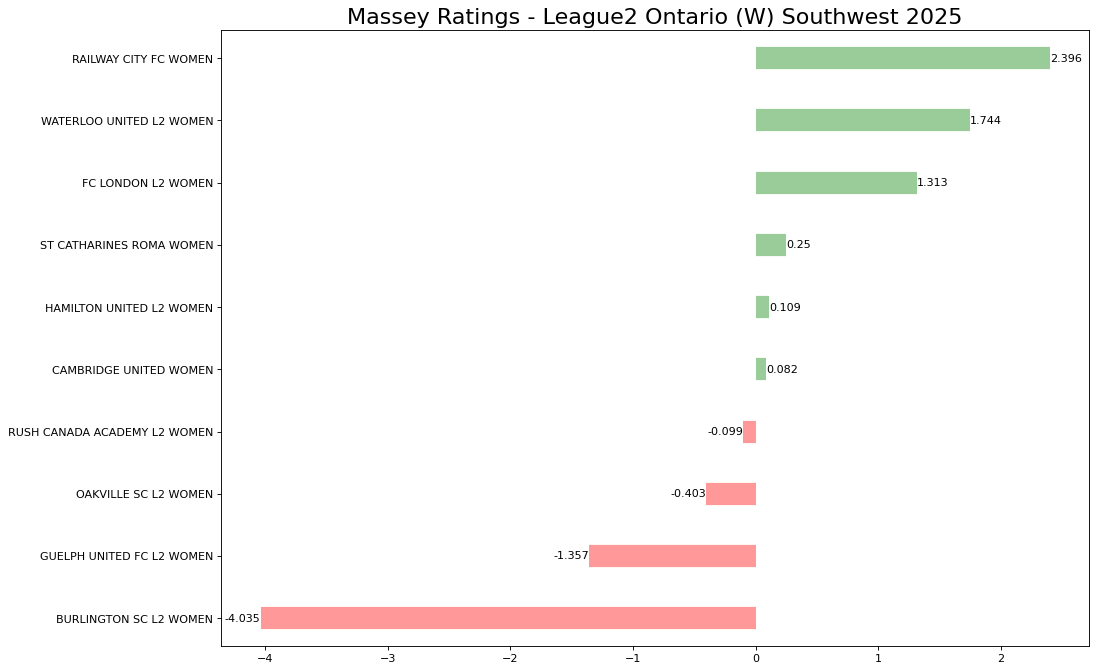

In [26]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [27]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                              massey_rating
RAILWAY CITY FC WOMEN              1.404438
WATERLOO UNITED L2 WOMEN           1.038617
FC LONDON L2 WOMEN                 0.933297
ST CATHARINES ROMA WOMEN           0.558389
RUSH CANADA ACADEMY L2 WOMEN       0.316004
OAKVILLE SC L2 WOMEN              -0.207134
HAMILTON UNITED L2 WOMEN          -0.351782
CAMBRIDGE UNITED WOMEN            -0.358839
GUELPH UNITED FC L2 WOMEN         -1.386023
BURLINGTON SC L2 WOMEN            -1.946968


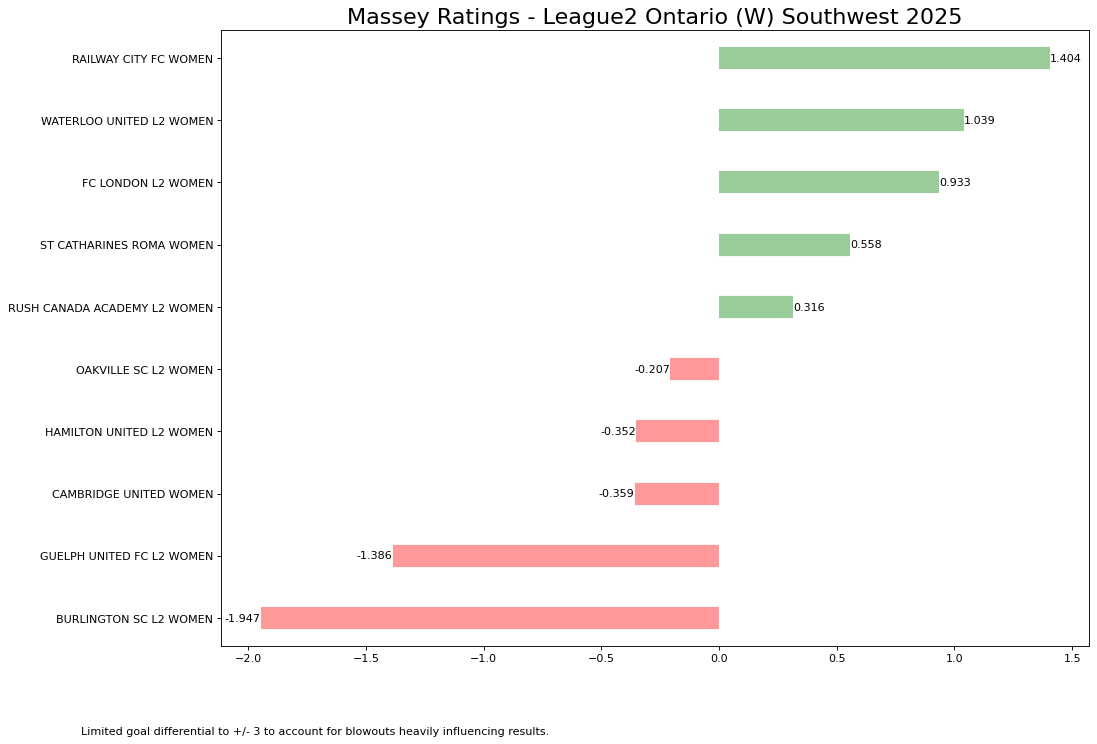

In [28]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})
plt.figtext(s=f'Limited goal differential to +/- {str(limit)} to account for blowouts heavily influencing results.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()